# Predicting Stroke Occurence

## Exploratory Data Analysis (EDA)

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px

In [6]:
data = pd.read_csv(r'C:\Users\HP\KaggleDatasets\healthcare-dataset-stroke-data.csv')

In [7]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


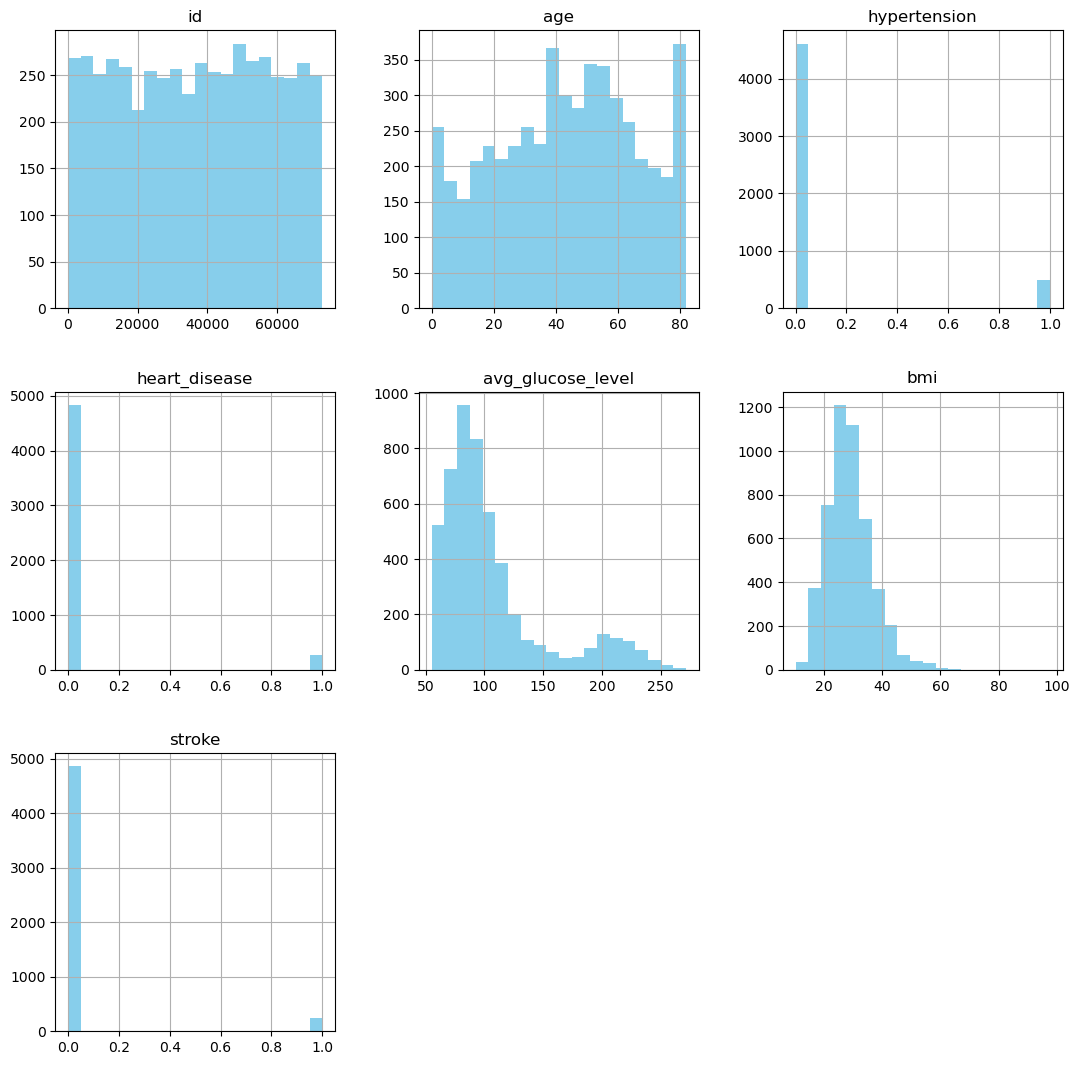

In [8]:
data.hist(bins=20, figsize=(13, 13), color="skyblue")
plt.show()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
missing_columns = data.columns[data.isnull().any()]
print(missing_columns)

Index(['bmi'], dtype='object')


In [11]:
for column in data.columns:
    print(f'{column} : {data[column].isnull().sum()}')

id : 0
gender : 0
age : 0
hypertension : 0
heart_disease : 0
ever_married : 0
work_type : 0
Residence_type : 0
avg_glucose_level : 0
bmi : 201
smoking_status : 0
stroke : 0


In [12]:
data.fillna(0, inplace=True)

In [22]:
for column in data.columns:
    print(f'{column} : {data[column].isnull().sum()}')

id : 0
gender : 0
age : 0
hypertension : 0
heart_disease : 0
ever_married : 0
work_type : 0
Residence_type : 0
avg_glucose_level : 0
bmi : 0
smoking_status : 0
stroke : 0


In [24]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,0.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [28]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,27.756732,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,9.529497,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,0.000000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,22.900000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,27.700000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [30]:
data.value_counts()

id     gender  age   hypertension  heart_disease  ever_married  work_type  Residence_type  avg_glucose_level  bmi   smoking_status   stroke
67     Female  17.0  0             0              No            Private    Urban           92.97              0.0   formerly smoked  0         1
49095  Female  16.0  0             0              No            children   Urban           64.51              21.2  Unknown          0         1
49229  Male    52.0  0             0              No            Govt_job   Rural           72.71              36.9  formerly smoked  0         1
49196  Female  27.0  0             0              Yes           Private    Urban           127.28             23.4  Unknown          0         1
49190  Female  45.0  0             0              Yes           Private    Rural           112.55             32.1  never smoked     0         1
                                                                                                                                       

In [34]:
data["stroke"].value_counts(normalize=True)

stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64

In [40]:
data["heart_disease"].value_counts(normalize=True)

heart_disease
0    0.945988
1    0.054012
Name: proportion, dtype: float64

In [42]:
data["hypertension"].value_counts(normalize=True)

hypertension
0    0.902544
1    0.097456
Name: proportion, dtype: float64

In [48]:
data["smoking_status"].value_counts(normalize = True)

smoking_status
never smoked       0.370254
Unknown            0.302153
formerly smoked    0.173190
smokes             0.154403
Name: proportion, dtype: float64

In [50]:
data["gender"].value_counts(normalize = True)

gender
Female    0.585910
Male      0.413894
Other     0.000196
Name: proportion, dtype: float64